In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

In [5]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.shape

(48895, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe()[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].transpose()

count        mean         std   min    25%  \
price                           48895.0  152.720687  240.154170  0.00  69.00   
minimum_nights                  48895.0    7.029962   20.510550  1.00   1.00   
number_of_reviews               48895.0   23.274466   44.550582  0.00   1.00   
reviews_per_month               38843.0    1.373221    1.680442  0.01   0.19   
calculated_host_listings_count  48895.0    7.143982   32.952519  1.00   1.00   
availability_365                48895.0  112.781327  131.622289  0.00   0.00   

                                   50%     75%      max  
price                           106.00  175.00  10000.0  
minimum_nights                    3.00    5.00   1250.0  
number_of_reviews                 5.00   24.00    629.0  
reviews_per_month                 0.72    2.02     58.5  
calculated_host_listings_count    1.00    2.00    327.0  
availability_365                 45.00  227.00    365.0

In [10]:
df[df.duplicated()]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [13]:
df[['name','host_name']] = df[['name','host_name']].replace(np.nan,'Not_available')

In [14]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df[df['host_name']=='Not_available']

id                                               name    host_id  \
360      100184                                          Bienvenue     526653   
2700    1449546                            Cozy Studio in Flatbush    7779204   
5745    4183989    SPRING in the City!! Zen-Style Tranquil Bedroom     919218   
6075    4446862                 Charming Room in Prospect Heights!   23077718   
6582    4763327                Luxurious, best location, spa inc'l   24576978   
8163    6292866                          Modern Quiet Gem Near All   32722063   
8257    6360224                    Sunny, Private room in Bushwick   33134899   
8852    6786181                       R&S Modern Spacious Hideaway   32722063   
9138    6992973                    1 Bedroom in Prime Williamsburg    5162530   
9817    7556587                               Sunny Room in Harlem   39608626   
14040  10709846                 Sunny, spacious room in Greenpoint    7822683   
14631  11553543                                  Cozy Room Astoria   26138712   
15174  12113879     Sunny, Large West Village 1 BR Near Everything    5300585   
19565  15648096              Spacious 2 bedroom close to Manhattan  100971588   
27777  21787094         Spacious and Bright Midtown East Apartment     415290   
27962  21867710  Amazing room in the centre on Manhatten! Welcome!  159156636   
28042  21901156  Best Deal! Lovely place in Manhattan! Time Squ...  159156636   
28274  21990808                 ***SLEEPING IN THE GOLDEN PLACE***  159156636   
30570  23660605    Private Bedroom w/ Balcony view of Central Park  177146433   
32193  25180572                     Beautiful Cozy Studio Apt. UWS  119609345   
38992  30468335            LARGE Prospect Lefferts Gardens Bedroom  228750026   

           host_name neighbourhood_group     neighbourhood  latitude  \
360    Not_available              Queens    Queens Village  40.72413   
2700   Not_available            Brooklyn          Flatbush  40.64965   
5745   Not_available           Manhattan            Harlem  40.80606   
6075   Not_available            Brooklyn     Crown Heights  40.67512   
6582   Not_available            Brooklyn        Greenpoint  40.72035   
8163   Not_available            Brooklyn     East Flatbush  40.65263   
8257   Not_available            Brooklyn          Bushwick  40.70146   
8852   Not_available            Brooklyn     East Flatbush  40.64345   
9138   Not_available            Brooklyn      Williamsburg  40.71838   
9817   Not_available           Manhattan            Harlem  40.82929   
14040  Not_available            Brooklyn        Greenpoint  40.73539   
14631  Not_available              Queens  Ditmars Steinway  40.77587   
15174  Not_available           Manhattan           Chelsea  40.73949   
19565  Not_available               Bronx        Highbridge  40.83844   
27777  Not_available           Manhattan   Upper East Side  40.76436   
27962  Not_available           Manhattan    Hell's Kitchen  40.75668   
28042  Not_available           Manhattan    Hell's Kitchen  40.75656   
28274  Not_available           Manhattan    Hell's Kitchen  40.75835   
30570  Not_available           Manhattan       East Harlem  40.79766   
32193  Not_available           Manhattan   Upper West Side  40.77701   
38992  Not_available            Brooklyn          Flatbush  40.65152   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
360    -73.76133     Private room     50               1                 43   
2700   -73.96154  Entire home/apt    100              30                 49   
5745   -73.95061     Private room     86               3                 34   
6075   -73.96146     Private room     50               1                  0   
6582   -73.95355  Entire home/apt    195               1                  1   
8163   -73.93215  Entire home/apt     85               2                182   
8257   -73.92792     Private room     37               1                  1   
8852   -73.93

In [16]:
df['reviews_per_month'] = df['reviews_per_month'].replace(np.nan,0.0)

In [17]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'distribution of listing prices')

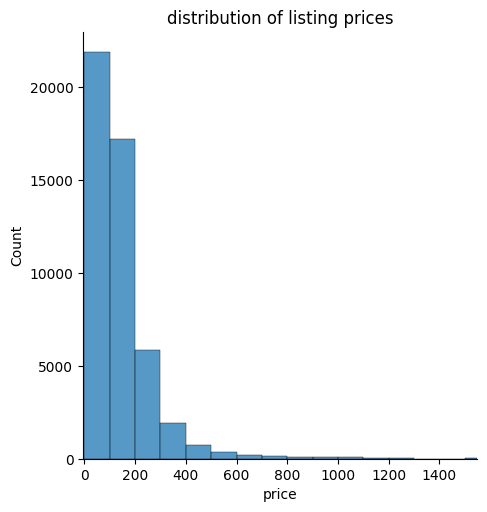

In [18]:
sns.displot(data=df,x='price',bins=100)
plt.xlim(-5,1550)
plt.title('distribution of listing prices')

In [48]:
fig = px.histogram(data_frame=df,x='neighbourhood_group',color='room_type',title='the distribution of room types by neighbourhood'
                   ,barmode='group')
fig.update_layout(hovermode='x')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
ng = df.groupby('neighbourhood_group').count()['calculated_host_listings_count'].to_frame().reset_index()

In [ ]:
ng

In [ ]:
explode = (0.8, 0, 0, 0, 0.8)

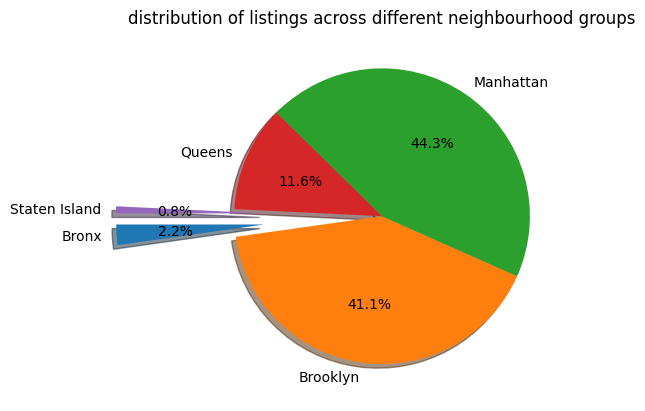

In [23]:
plt.pie(ng['calculated_host_listings_count'],labels=ng['neighbourhood_group'],autopct='%1.1f%%',explode=explode,shadow=True,
       startangle=180)
plt.title('distribution of listings across different neighbourhood groups')
plt.show()

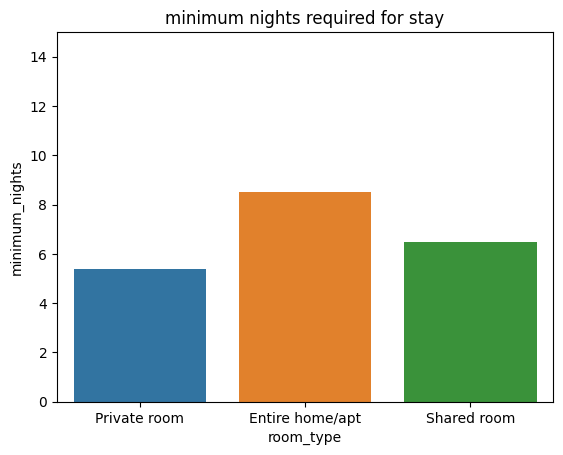

In [24]:
sns.barplot(data=df,y='minimum_nights',x='room_type',errorbar=('ci',False))
plt.ylim(0,15)
plt.title('minimum nights required for stay')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Price vs reviews')

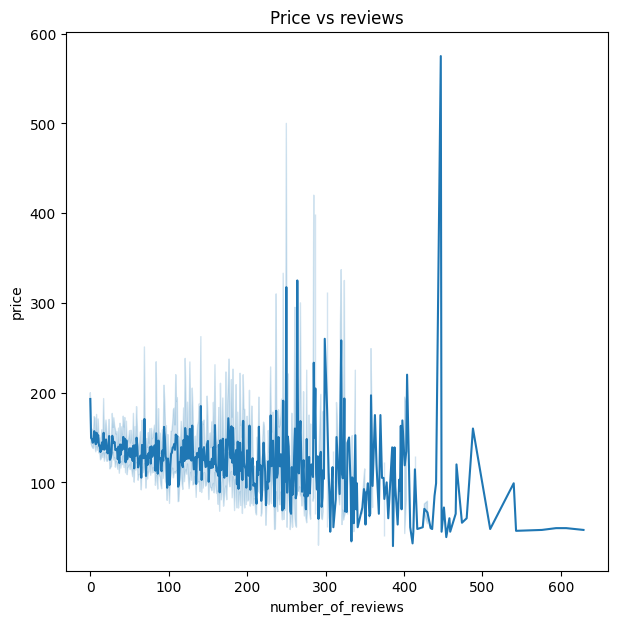

In [25]:
plt.figure(figsize=(7,7)) 
sns.lineplot(data=df,x='number_of_reviews',y='price')
plt.title('Price vs reviews')

In [26]:
host_listing_count = df.groupby('host_name').sum()['calculated_host_listings_count'].to_frame().reset_index()

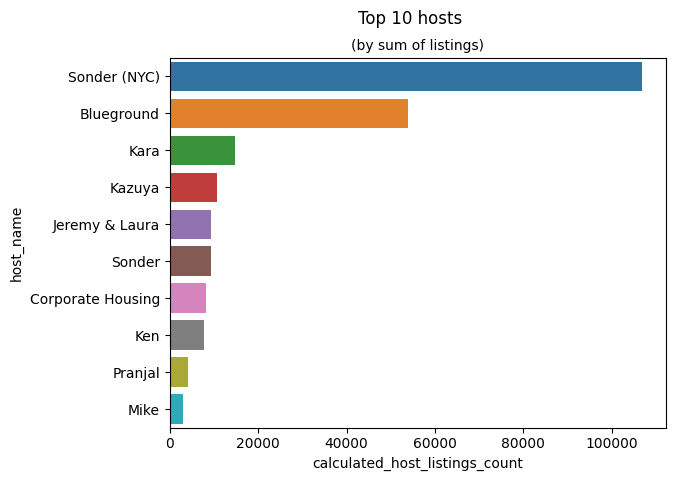

In [27]:
sns.barplot(data=host_listing_count[host_listing_count['calculated_host_listings_count']>1].sort_values(by = 'calculated_host_listings_count',ascending=False).head(10),
             y='host_name',x='calculated_host_listings_count')
plt.suptitle('Top 10 hosts')
plt.title('(by sum of listings)',size=10)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Availability Distribution')

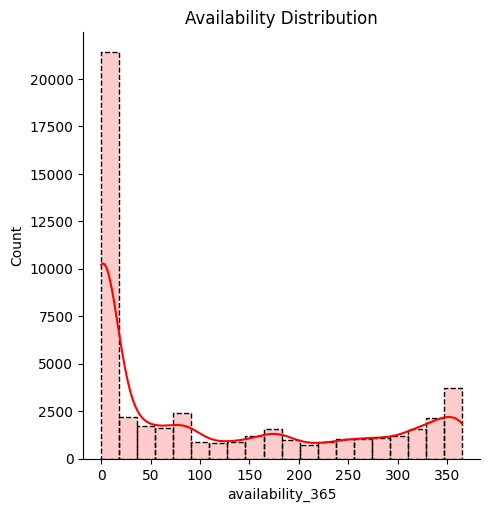

In [28]:
sns.displot(data=df,x='availability_365',bins=20,kde=True,color='red',ls='--',alpha=0.2)
plt.title('Availability Distribution')

Text(0.5, 1.0, 'Price vs. Room Type')

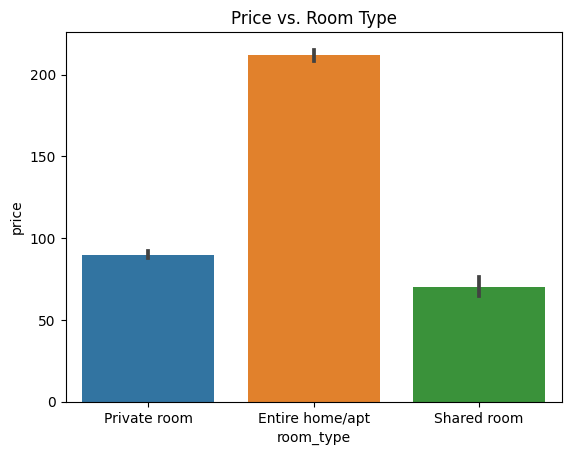

In [29]:
sns.barplot(data=df,x='room_type',y='price')
plt.title('Price vs. Room Type')

Price vs. Neighbourhood Group


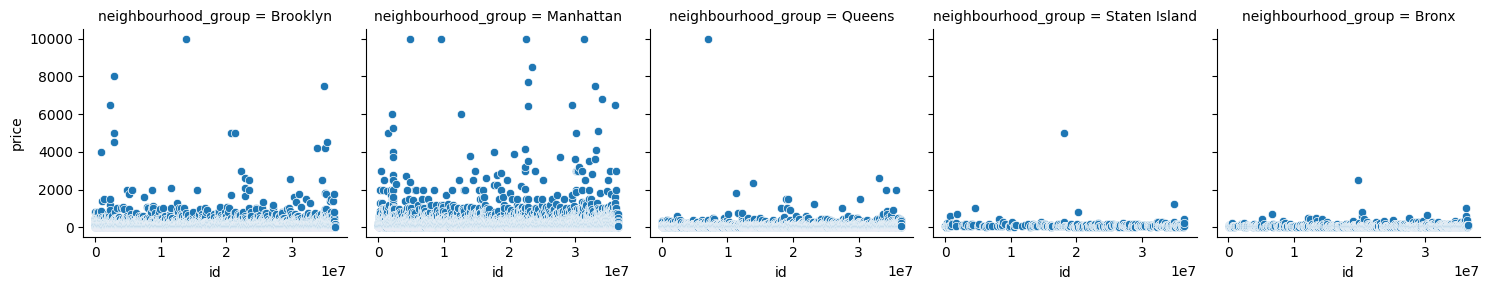

In [30]:
g = sns.FacetGrid(df,col='neighbourhood_group')
g.map(sns.scatterplot,'id','price')
print('Price vs. Neighbourhood Group')
plt.show()

In [31]:
at = 'pk.eyJ1IjoiYW5hbnRobWFyazIiLCJhIjoiY2x1MmwxcWdzMDN4YjJqbjR3M3B0N3U2biJ9.C434qExwgje6bznugA7Q2Q'

In [ ]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',color='neighbourhood_group'
                        ,title='spatial distribution of Airbnb listings across the city')
fig.update_layout(mapbox_style='dark',mapbox_accesstoken=at)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
df.price.mean()

In [34]:
fig = px.density_mapbox(data_frame=df,lat='latitude',lon='longitude',z=df.price,
                        hover_data=df[['neighbourhood_group','neighbourhood']],
                        title='areas with the listing prices',color_continuous_scale='Inferno_r')
fig.update_layout(mapbox_style='dark',mapbox_accesstoken=at)

In [35]:
fig = px.scatter_mapbox(data_frame=df,lat='latitude',lon='longitude',
                        hover_data=df[['neighbourhood_group','neighbourhood']],
                   color='room_type',
                    title='spatial distribution of Airbnb listings based on room types across different neighbourhoods in the city')
fig.update_layout(mapbox_style='streets',mapbox_accesstoken=at)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [37]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [51]:
x.corr()

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
reviews_per_month              -0.050564       -0.124905           0.589407   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   

                                reviews_per_month  \
price                                   -0.050564   
minimum_nights                          -0.124905   
number_of_reviews                        0.589407   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.047312   
availability_365                         0.163732   

                                calculated_host_listings_count  \
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.047312   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
reviews_per_month                       0.163732  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

In [38]:
x=df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

<Axes: >

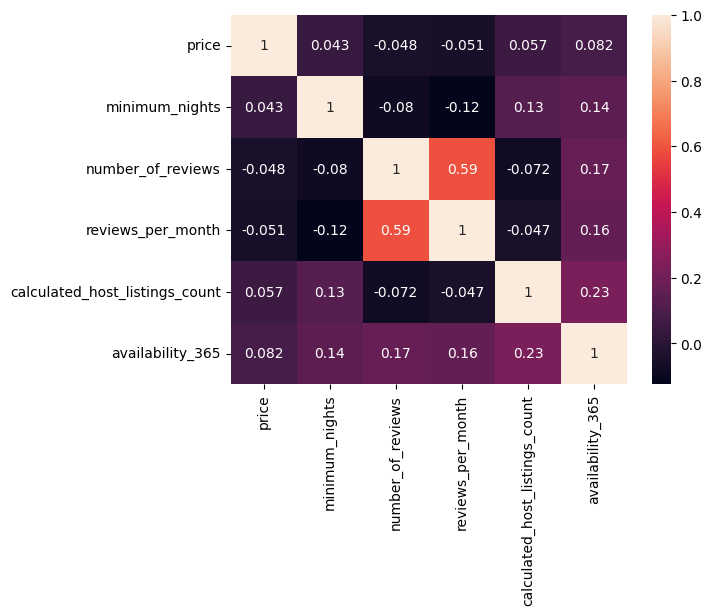

In [39]:
sns.heatmap(x.corr(),annot=True)